# Automatická klasifikace textů

Obrázky převzaty z [NLTK Book](http://www.nltk.org/book/).

Složky strojového učení:

1. **extrakce rysů**: tím počítači řekneme, čemu má v datech věnovat pozornost
2. **trénování**: pomocí vybraného **učicího algoritmu** se snažíme vypozorovat pravidelnosti v trénovacích datech; souboru takových znalostí se říká **model**
3. **predikce**: natrénovaný model pomocí vybraného **rozhodovacího algoritmu** aplikujeme na nová data, díky čemuž se o nich dozvíme něco nového
4. **evaluace** výsledků

U které složky (příp. kterých složek) je nejužitečnější konzultovat *doménového experta* (tj. např. v případě jazykových dat lingvistu)?

## Učení s učitelem (*supervised learning*)

![supervised](http://www.nltk.org/images/supervised-classification.png)

## Učení bez učitele (*unsupervised learning*)

Např. *Latent Semantic Analysis* aj. V Pythonu knihovna [`gensim`](https://radimrehurek.com/gensim/) (viz závěrečný úkol).

## Trénovací, vývojová a testovací data

![data](http://www.nltk.org/images/corpus-org.png)

## Evaluace

### Accuracy (úspěšnost)

Procento správně určených štítků.

$$Accuracy = \frac{N_{correct}}{N_{total}}$$

Nevýhody viz [kap. 6](http://www.nltk.org/book/ch06.html) odd. 3.2 v NLTK book.

### Precision (přesnost), recall (výtěžnost) a F-skóre 

Užitečné zejména v oblasti *information retrieval* (tedy např. i pro posuzování kvality korpusového dotazu), kde jsou nevýhody *accuracy* obzvlášť palčivé. Viz [článek na wiki ÚČNK](http://wiki.korpus.cz/doku.php/pojmy:precision).

![precision_recall](http://www.nltk.org/images/precision-recall.png)

$$Precision = \frac{N_{relevant+retrieved}}{N_{retrieved}}$$

$$Recall = \frac{N_{relevant+retrieved}}{N_{relevant}}$$

$$F = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$$

### Konfuzní matice

```
    |                                         N                      |
    |      N      I      A      J             N             V      N |
    |      N      N      T      J      .      S      ,      B      P |
----+----------------------------------------------------------------+
 NN | <11.8%>  0.0%      .   0.2%      .   0.0%      .   0.3%   0.0% |
 IN |   0.0%  <9.0%>     .      .      .   0.0%      .      .      . |
 AT |      .      .  <8.6%>     .      .      .      .      .      . |
 JJ |   1.7%      .      .  <3.9%>     .      .      .   0.0%   0.0% |
  . |      .      .      .      .  <4.8%>     .      .      .      . |
NNS |   1.5%      .      .      .      .  <3.2%>     .      .   0.0% |
  , |      .      .      .      .      .      .  <4.4%>     .      . |
 VB |   0.9%      .      .   0.0%      .      .      .  <2.4%>     . |
 NP |   1.0%      .      .   0.0%      .      .      .      .  <1.8%>|
----+----------------------------------------------------------------+
(row = reference; col = test)
```

## Typy klasifikátorů

### Naive Bayes

Intuice:

![process](http://www.nltk.org/images/naive-bayes-triangle.png)

Výpočet:

![naive](http://www.nltk.org/images/naive_bayes_bargraph.png)

#### Bayesovo pravidlo

Představte si, že máme natrénovaný `NaiveBayesClassifier` a snažíme se s jeho pomocí určit štítek ($label$) pro nějakou položku (jméno, text...). Položka je charakterizovaná nějakými rysy ($features$), které jsme z ní vyextrahovali a které jsou tedy dané. Ze sady dostupných štítků, s nimiž byl náš klasifikátor natrénován, se snažíme vybrat ten, který se při daných rysech jeví jako nejpravděpodobnější.

Jinými slovy, chceme vybrat štítek tak, aby celková (**úplná**) pravděpodobnost $P(features, label)$ toho, že se štítek vyskytne současně s danými rysy, byla co nejvyšší. (Informace o pravděpodobnostech souvýskytu různých štítků s různými rysy jsme získali z trénovacích dat při trénování klasifikátoru.) Spočítat tuto pravděpodobnost přímo ale nejde, a to z toho důvodu, že tuto přesnou kombinaci rysů, která odpovídá položce, kterou chceme aktuálně klasifikovat, jsme v rámci trénovacích dat nejspíš nepotkali, takže z hlediska našich předchozích pozorování je tato pravděpodobnost nulová, ať už by byl štítek jakýkoli, což nám při jeho výběru moc nepomůže. Je tedy potřeba ji převést na součin nějakých (nenulových) dílčích složek.

Můžeme se odpíchnout od toho, že úplnou pravděpodobnost souvýskytu daných rysů s konkrétním štítkem $P(features, label)$ můžeme spočítat dvěma způsoby (pro "důkaz" této rovnosti viz níže příklad):

$$
P(features, label) =
\begin{cases}
P(label) \cdot P(features \mid label) \\
P(features) \cdot P(label \mid features)
\end{cases}
$$

Pravděpodobnosti se svislítkem jsou tzv. **podmíněné** pravděpodobnosti a pokud jste se s nimi ještě nesetkali, jejich význam vám snad osvětlí příklad níže. Z této rovnosti vyplývá tzv. Bayesovo pravidlo, které můžeme zapsat různými způsoby (podle toho, jak poskládáme symboly po obou stranách rovnítka), např. takto:

$$
P(label \mid features) = \frac{P(label) \cdot P(features \mid label)}{P(features)}
\qquad \Bigg( = \frac{P(features, label)}{P(features)} \Bigg)
$$

$P(label \mid features)$ je pravděpodobnost štítku $label$ za předpokladu, že máme dané rysy $features$. Přísně vzato bychom se tedy při výběru štítku měli snažit maximalizovat právě tuto *podmíněnou* pravděpodobnost. Naštěstí mezi ní a *úplnou* pravděpodobností $P(features, label)$, o které jsme mluvili zezačátku, existuje přímá úměra, jak je patrné z rovnice: obě strany se liší jen o koeficient $\frac{1}{P(features)}$, který je konstatní, protože při výběru štítku pro stanovenou položku jsou rysy dané a neměnné (odvozené z položky).

**Příklad:** Mějme úlohu, v níž se snažíme určit příslušnost křestních jmen k jednotlivým pohlavím (`F`, `M`). Máme jediný rys, a to zda dané jméno končí na *a* (`a`, `ne-a`). Z trénovacích dat jsme nashromáždili údaje shrnuté v následující kontingenční tabulce:

```
|   |  a | ne-a |        |
|---+----+------+--------|
| F | 33 |    4 |     37 |
| M |  2 |   40 |     42 |
|---+----+------+--------|
|   | 35 |   44 | Σ = 79 |
```

Z ní můžeme např. odvodit, že pravděpodobnost $P(a)$, že jméno končí na *a*, je $\frac{35}{79}$, nebo že podmíněná pravděpodobnost $P(F \mid a)$, že jméno je ženské, když končí na *a*, je $\frac{33}{35}$. (Ujistěte se, že vám výpočty dávají intuitivně smysl!)

Chceme si na tomto příkladu ověřit, že Bayesovo pravidlo skutečně platí; zkusme tedy např. dokázat, že:

$$
P(a, F) =
\begin{cases}
P(F) \cdot P(a \mid F) \\
P(a) \cdot P(F \mid a)
\end{cases}
$$

Dosaďme tedy na základě tabulky:

$$
\begin{align}
P(a, F) & = \ldots & = \frac{33}{79} \\
P(F) \cdot P(a \mid F) & = \frac{37}{79} \cdot \frac{33}{37} & = \frac{33}{79} \\
P(a) \cdot P(F \mid a) & = \frac{35}{79} \cdot \frac{33}{35} & = \frac{33}{79}
\end{align}
$$

Na základě tohoto příkladu se tedy zdá, že Bayesovo pravidlo funguje :) Nejedná se o přísně formální důkaz, spíš ukázku s konkrétními čísly, ale stačilo by za čísla dosadit symboly a obecnější důkaz je na světě.

#### Naivita

Vraťme se k položce, kterou se snažíme klasifikovat. Položku reprezentujeme jako sadu rysů a chceme zjistit, jaký štítek je při dané sadě rysů nejpravděpodobnější -- jinými slovy, chceme maximalizovat pravděpodobnost $P(label \mid features)$. Tuto pravděpodobnost nejjednodušeji spočítáme na základě Bayesova pravidla (viz předchozí rovnice). Hodnota jmenovatele této rovnice, $P(features)$, nezávisí na štítku, jen na rysech (a ty se v rámci oné jedné položky, o jejíž klasifikaci usilujeme, nemění), je tedy pro všechny různé štítky, o kterých můžeme uvažovat, stejná. Chceme-li tím pádem najít maximální hodnotu $P(label \mid features)$, stačí najít maximální hodnotu čitatele $P(label) \cdot P(features \mid label)$.

Při předpokladu vzájemné nezávislosti všech rysů pak platí (tento předpoklad je naivní, rysy spolu většinou korelují, odtud *Naive* Bayes):

$$P(label) \cdot P(features \mid label) \quad \Bigg( = \quad P(features, label) \Bigg) \quad \approx \quad P(label) \cdot \prod_{f\:in\:features} P(f \mid label)$$

Tento vztah lze odvodit z tzv. *chain rule of probability* (intuice pro toto pravidlo viz další oddíl). Tato věta nám umožňuje postupně převést úplnou pravděpodobnost souvýskytu jevů na součin podmíněných pravděpodobností.

**Příklad:** Mějme 3 rysy $f, g, h$, chceme tedy maximalizovat $P(f, g, h, label)$. Pro každý štítek spočítáme:

$$
\begin{align}
P(f, g, h, label) & = P(f \mid g, h, label) \cdot P(g, h, label)\\
& = P(f \mid g, h, label) \cdot P(g \mid h, label) \cdot P(h, label)\\
& = P(f \mid g, h, label) \cdot P(g \mid h, label) \cdot P(h \mid label) \cdot P(label)\\
& \text{(až doteď bylo vše exaktní, teprve nyní využijeme naivní předpoklad vzájemné nezávislosti rysů)}\\
& \approx P(f \mid label) \cdot P(g \mid label) \cdot P(h \mid label) \cdot P(label)\\
\end{align}
$$

Samotné dílčí podmíněné pravděpodobnosti jako např. $P(f \mid label)$ jsou přesně ty údaje, které si klasifikátor nashromáždil při trénování. Např. bylo-li v trénovacích datech $39$ položek se štítkem $label$ a $14$ z nich vykázalo rys $f$, pak $P(f \mid label) = \frac{14}{39}$ a tuto pravděpodobnost započítám do součinu při klasifikaci každé nové položky, která taky vykazuje rys $f$. Naopak při klasifikaci položky, která rys $f$ nevykazuje, započítám doplňkovou pravděpodobnost $\frac{39 - 14}{39}$ (= že se rys $f$ pod štítkem $label$ nevyskytne).

**A tím máme vlastně hotovo** -- spočítáme $P(f, g, h, label)$ pro (dané) rysy $f, g, h$ a (všechny dostupné) štítky a vybereme štítek, který tuto pravděpodobnost maximalizuje.

#### Intuice pro *chain rule of probability*

Mějme tři jevy $A$, $B$ a $C$, které mohou nastat v různých situacích buď společně anebo odděleně. V diagramu níže jsou naznačeny počty pozorování, které jsme pro jednotlivé situace zaznamenali.

<IPython.core.display.Javascript object>


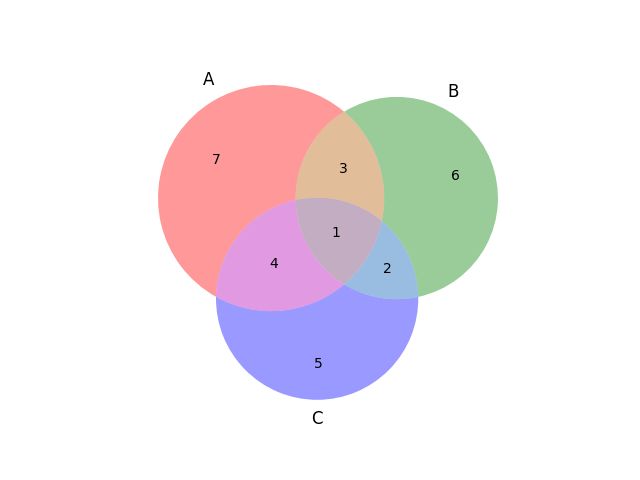

In [6]:
%matplotlib notebook

import matplotlib_venn as mv

mv.venn3(subsets=(7, 6, 3, 5, 4, 2, 1))

Zajímá nás pravděpodobnost $P(A, B, C)$, že nastanou všechny tři zároveň. Tu můžeme rovnou spočítat následovně (na základě výše uvedeného diagramu):

$$P(A, B, C) = \frac{N_{A \land B \land C}}{N_{tot}} = \frac{1}{28}$$

Zároveň ji dle *chain rule* můžeme převést na:

$$P(A, B, C) = P(A \mid B, C) \cdot P(B \mid C) \cdot P(C)$$

(Nebo klidně třeba i na $P(B \mid A, C) \cdot P(C \mid A) \cdot P(A)$, na pořadí nezáleží.)

Jednotlivé činitele součinu můžeme spočítat následovně (znovu na základě diagramu):

$$
\begin{align}
P(A \mid B, C) & = \frac{N_{A \land B \land C}}{N_{B \land C}} \\
P(B \mid C) & = \frac{N_{B \land C}}{N_C} \\
P(C) & = \frac{N_C}{N_{tot}}
\end{align}
$$

Když je mezi sebou vynásobíme, dospějeme díky krácení ke stejnému výsledku jako výše s $P(A, B, C)$:

$$
\frac{N_{A \land B \land C}}{N_{B \land C}} \cdot \frac{N_{B \land C}}{N_C} \cdot \frac{N_C}{N_{tot}}
= \frac{N_{A \land B \land C}}{N_{tot}}
= P(A, B, C)
\qquad \Bigg( = \frac{1}{28} \Bigg) \qquad \mathrm{QED}
$$

#### Drobnosti

- Výše jsme naznačili, že nulové pravděpodobnosti jsou problém. Proto se nesnažíme rovnou odhadnout úplnou pravděpodobnost, ale převést ji na součin dílčích podmíněných. Co se ale stane, když je nějaká z těchto dílčích pravděpodobností nulová? Jsme tam, kde jsme byli -- jedna nula v součinu způsobí, že celkový výsledek bude nula. Proto se používá tzv. **smoothing**: řeší problém s nízkými / nulovými frekvencemi → nulové pravděpodobnosti převede na malé, ale nenulové.
- Z výkladu výše plyne, že systém je stavěný na binární rysy -- rys buď přítomný je, a pak do součinu zahrneme podmíněnou pravděpodobnost toho, že se rys pod daným štítkem vyskytne, nebo není, a pak zahrneme pravděpodobnost, že se nevyskytne. Co tedy s nebinárními rysy, typu `barva = červená` nebo `věk = 28`? Binarizovat! → `barva(červená) = ano`, `věk(28) = ne` apod. (`nltk.NaiveBayesClassifier` to už vlastně dělá za nás, takže při extrakci rysů to sami řešit nemusíme.)
- Klasifikace je vlastně taky typ "značkování" textu. Jak byste postupovali, kdybyste `NaiveBayesClassifier` chtěli použít pro morfologické značkování? Jaké to skýtá (ne)výhody oproti jednoduchému n-gramovému taggeru?

### Maximum Entropy Classifiers

Méně naivní -- snaží se brát v potaz možné závislosti mezi rysy. Viz [kap. 6](http://www.nltk.org/book/ch06.html) odd. 6 v NLTK book.

### Rozhodovací stromy (*decision trees*)

Snadná interpretace. Viz [kap. 6](http://www.nltk.org/book/ch06.html) odd. 4 v NLTK book.